In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 1000)
sns.set(style='darkgrid')
sns.set(font="Tahoma")
import numpy as np


tk = pd.read_csv("tokenize_df.csv")
del tk["Unnamed: 0"]

import ast
arr = []

for sentence in tk["case_token"]:
    for word in ast.literal_eval(sentence):
        if word != 'และ':
            arr.append(word)
    

In [70]:
tk

,a1,a2,a3,case,case_id,name,status,num_receive,date_receive,case_token
0,เจ้าพนักงานธุรการปฏิบัติงาน สำนักฝึกอบรม สถาบันพัฒนาข้าราชการฝ่ายอัยการ,ส่วนราชการที่ไม่สังกัดกระทรวง/ทบวง,สำนักงานอัยการสูงสุด,"กรณียักยอกเงินทดรองราชการโครงการอบรมหลักสูตรต่างๆ ของสถาบันพัฒนาข้าราชการฝ่ายอัยการไปใช้ส่วนตัว รวมเป็นเงินทั้งสิ้น 3,501,511.20 บาท",6190010256,นางสาวพัชนิดา เค้าแคน,แจ้งคำสั่งมอบหมายพนักงานไต่สวน,31464,2017-10-10,"['กรณี', 'ยัก', 'ยอก', 'เงิน', 'ทดรอง', 'ราชการ', 'โครงการ', 'อบรม', 'หลักสูตร', 'ต่างๆ', ' ', 'ของ', 'สถาบัน', 'พัฒนาข้า', 'ราชการ', 'ฝ่าย', 'อัยการ', 'ไป', 'ใช้', 'ส่วน', 'ตัว', ' ', 'รวม', 'เป็น', 'เงิน', 'ทั้งสิ้น', ' ', '3', ',', '501', ',', '511', '.', '20', ' ', 'บาท']"
1,เมื่อครั้งดำรงตำแหน่งนักวิชาการศาสนาชำนาญการพิเศษ,ส่วนราชการมีฐานะเป็นกรมไม่สังกัดสำนักนายกรัฐมนตรีหรือกระทรวง,สำนักงานพระพุทธศาสนาแห่งชาติ,กรณีทุจริตการเบิกเงินงบประมาณอุดหนุนการบูรณปฏิสังขรณ์ที่ได้จัดสรรให้วัดศรีบุญนำ ตำบลสรอย อำเภอวังชิ้น จังหวัดแพร่ ประจำปีงบประมาณ 2557 และประจำปีงบประมาณ 2558,6190010042,นายวสวัตติ์ หรือนายสงกรานต์ กิตติธีระสิทธิ์ หรือสาทาวงศ์,-,30262,2017-09-26,"['กรณี', 'ทุจริต', 'การ', 'เบิก', 'เงิน', 'งบ', 'ประมาณ', 'อุดหนุน', 'การ', 'บูรณปฏิสังขรณ์', 'ที่', 'ได้', 'จัดสรร', 'ให้', 'วัดศรีบุญนำ', ' ', 'ตำบลสรอย', ' ', 'อำเภอวังชิ้น', ' ', 'จังหวัดแพร่', ' ', 'ประจำ', 'ปี', 'งบ', 'ประมาณ', ' ', '2557', ' ', 'และ', 'ประจำ', 'ปี', 'งบ', 'ประมาณ', ' ', '2558']"
2,นายกองค์การบริหารส่วนตำบลดงดวน,กระทรวงมหาดไทย,กรมส่งเสริมการปกครองท้องถิ่น,การสอบแข่งขันบุคคลเพื่อบรรจุเป็นพนักงานส่วนตำบลในพื้นที่จังหวัดมหาสารคาม นายสวาท ปาธิสัตย์ นายกอบต.ดงดวน จ.มหาสารคาม,6160071165,นายสวาท ปาธิสัตย์,-,23364,2015-09-24,"['การ', 'สอบ', 'แข่งขัน', 'บุคคล', 'เพื่อ', 'บรรจุ', 'เป็น', 'พนักงาน', 'ส่วน', 'ตำบล', 'ใน', 'พื้นที่', 'จังหวัดมหาสารคาม', ' ', 'นายสวาท ปาธิสัตย์', ' ', 'นายก', 'อบ', 'ต.ดงดวน', ' ', 'จ.มหาสารคาม', ' ']"
3,นายก อบต,หน่วยงานองค์กรปกครองส่วนท้องถิ่น,NaN,ร่วมกันทุจริตในการสอบแข่งขันบุคคลเพื่อบรรจุเป็นพนักงานส่วนตำบลในพื้นที่จังหวัดมหาสารคาม,6160070639,นายยุทธภูมิ กุรัตน์,แจ้งคำสั่งแต่งตั้งคณะอนุกรรมการไต่สวน,23364,2015-09-24,"['ร่วม', 'กัน', 'ทุจริต', 'ใน', 'การ', 'สอบ', 'แข่งขัน', 'บุคคล', 'เพื่อ', 'บรรจุ', 'เป็น', 'พนักงาน', 'ส่วน', 'ตำบล', 'ใน', 'พื้นที่', 'จังหวัดมหาสารคาม']"
4,นายก อบต,หน่วยงานองค์กรปกครองส่วนท้องถิ่น,NaN,-,6160070638,นายสุภาพ ผาบพุทธา,สอบปากคำพยานบุคคล,23364,2015-09-24,['-']
5,นายก อบต,หน่วยงานองค์กรปกครองส่วนท้องถิ่น,องค์การบริหารส่วนตำบล (อบต.),ทุจริตการสอบแข่งขันมหาสารคาม ปี 2557,6160070637,นายเกริกฤทธิ์ อามาตร,จัดทำคำสั่งแต่งตั้งคณะอนุกรรมการไต่สวน,23364,2015-09-24,"['ทุจริต', 'การ', 'สอบ', 'แข่งขัน', 'มหาสารคาม', ' ', 'ปี', ' ', '2557']"
6,นายกอบต.เขื่อน,หน่วยงานองค์กรปกครองส่วนท้องถิ่น,องค์การบริหารส่วนตำบล (อบต.),ทุจริตการสอบแข่งขัน จังหวัดมหาสารคาม ปีพ.ศ. 2557,6160070636,นายบุญทัน สินธุเสน,-,23364,2015-09-24,"['ทุจริต', 'การ', 'สอบ', 'แข่งขัน', ' ', 'จังหวัดมหาสารคาม', ' ', 'ปี', 'พ.ศ.', ' ', '2557']"
7,เจ้าหน้าที่เทศบาลตำบลหนองสอ,NaN,NaN,"ปฏิเสธไม่ขายแบบสอบราคาโครงการจ้างเหมาก่อสร้างถนนคอนกรีตเสริมเหล็ก ถนนสุขาภิบาล 2 เอื้ออำนวยแก่ผู้เข้าทำการเสนอราคาบางราย (เรื่องกล่าวหาเลขดำที่ 48980445 เลขแดงที่ 62789950)\nออกเลขใหม่ตามมติคณะกรรมการ ป.ป.ช. ครั้งที่ 907-78/2560 วาระ 4.10 ลงวันที่ 10 ตุลาคม 2560 เสนอทบทวนมติคณะกรรมการ ป.ป.ช.\nปกปิดการสอบราคาจ้างเหมาก่อสร้างถนน คสล. ถนนสุขาภิบาล 2 ระหว่าง หมู่ 4 - ปากคอสะพาน หมู่ 4 ตำบลลำปาว ราคากลาง 450,000 บาท ตามประกาศ ลว. 1 ต.ค. 47 \nเอกสารสอบราคาเลขที่ 14/2547 โดยปฏิเสธไม่ยินยอมขายแบบให้แก่ผู้กล่าวหา อ้างว่าไม่มีการสอบราคาแต่อย่างใด เป็นเหตุให้ผู้กล่าวหาเสียสิทธิ์ ในการเสนอราคาโครงการดังกล่าว และปรากฎว่า\n ห้างหุ้นส่วนจำกัด หงษ์สายพินคอนสตรั๊คชั่น เป็นผู้เสนอราคาต่ำสุด และได้เป็นผู้รับจ้าง ตามสัญญาจ้างเลขที่ 2/2548 ลว. 22 ต.ค.47 ในวงเงิน 445,000 บาท เหตุเกิดระหว่างวันที่ 1 - 8 ต.ค. 47",6140440462,(ไม่ระบุชื่อ-สกุลและตำแหน่ง),-,-,2017-10-31,"['ปฏิเสธ', 'ไม่', 'ขาย', 'แบบ', 'สอบ', 'ราคา', 'โครงการ', 'จ้าง', 'เหมา', 'ก่อสร้าง', 'ถนน', 'คอนกรีต', 'เสริมเหล็ก', ' ', 'ถนนสุขาภิบาล', ' ', '2', ' ', 'เอื้ออำนวย', 'แก่', 'ผู้', 'เข้า', 'ทำ', 'การ', 'เสนอ', 'ราคา', '

In [17]:
text = ' '.join(arr)

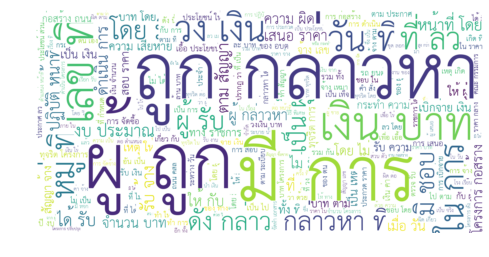

In [19]:

from pythainlp.corpus import stopwords # ใช้ลบคำที่ไม่ใช้ออก
from wordcloud import WordCloud
wordcloud = wordcloud = WordCloud(font_path='THSarabunNew.ttf', # path ที่ตั้ง Font
                      stopwords = ' '.join(stopwords.words('thai')), # ลบคำที่ไม่ใช้ออก
                      background_color="white", # ตั้งค่าพืสี้นหลัง
                      regexp=r"[\u0E00-\u0E7Fa-zA-Z']+", # ป้องกัน bug วรรณยุกต์
                      width=2056, # กว้าง
                      height=1024, # ยาว
                      ).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

# # lower max_font_size
# wordcloud = WordCloud(font_path='THSarabunNew.ttf', max_font_size=40).generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

In [68]:
from collections import Counter

word = pd.DataFrame.from_dict(dict(Counter(arr)), orient="index")
word = word.reset_index()
word.columns = ["word", "count"]
word_sorted = word.sort("count", ascending=False)
word_sorted = word_sorted.iloc[4:]

/Users/mikephul/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


In [69]:
word_sorted

,word,count
84,ผู้,4363
139,โดย,3957
21,เป็น,3886
3,เงิน,3707
40,ให้,3371
56,ใน,3220
135,\n,3105
143,มี,3001
27,.,2934
101,ตาม,2689
